## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# answer goes here
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')
data.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [3]:
# answer goes here
score_data = data.loc[:, data.columns.str.endswith('score')]

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [4]:
# answer goes here
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(score_data), columns=score_data.columns)

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [5]:
# answer goes here
distortions = [] 
inertias = []
silhouettes = [] 
mapping1 = {} 
mapping2 = {} 

k = range(2, 30)

for i in k:
  km = KMeans(n_clusters=i)
  km.fit(X_scaled)

  inertias.append(km.inertia_)
  silhouettes.append(silhouette_score(X_scaled, km.fit_predict(X_scaled), metric='euclidean'))

  mapping1[k] = sum(np.min(cdist(X_scaled, km.cluster_centers_,
                                 'euclidean'), axis=1)) / X_scaled.shape[0]
  mapping2[k] = km.inertia_ 

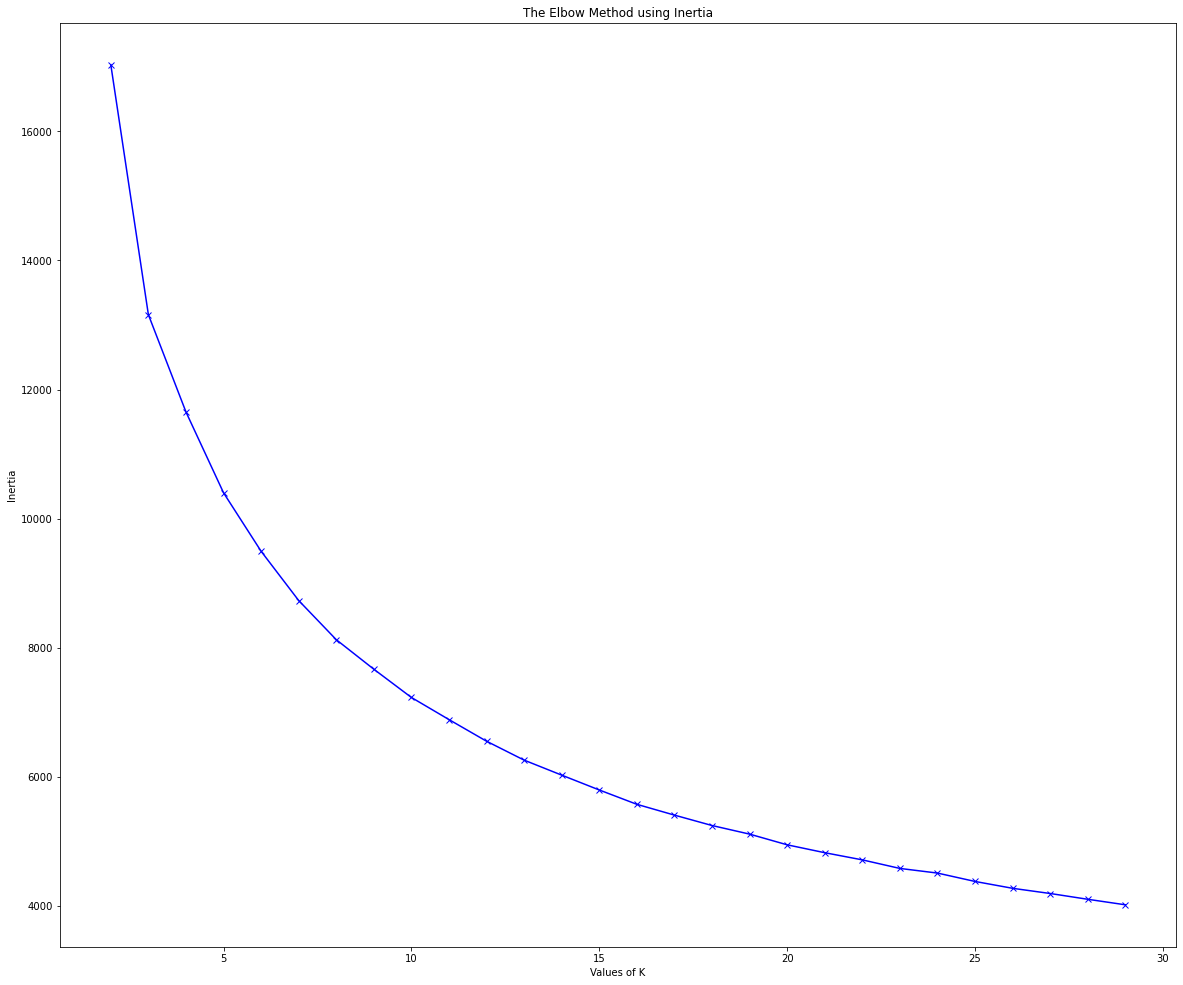

In [6]:
plt.figure(figsize=(20,17))
plt.plot(k, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

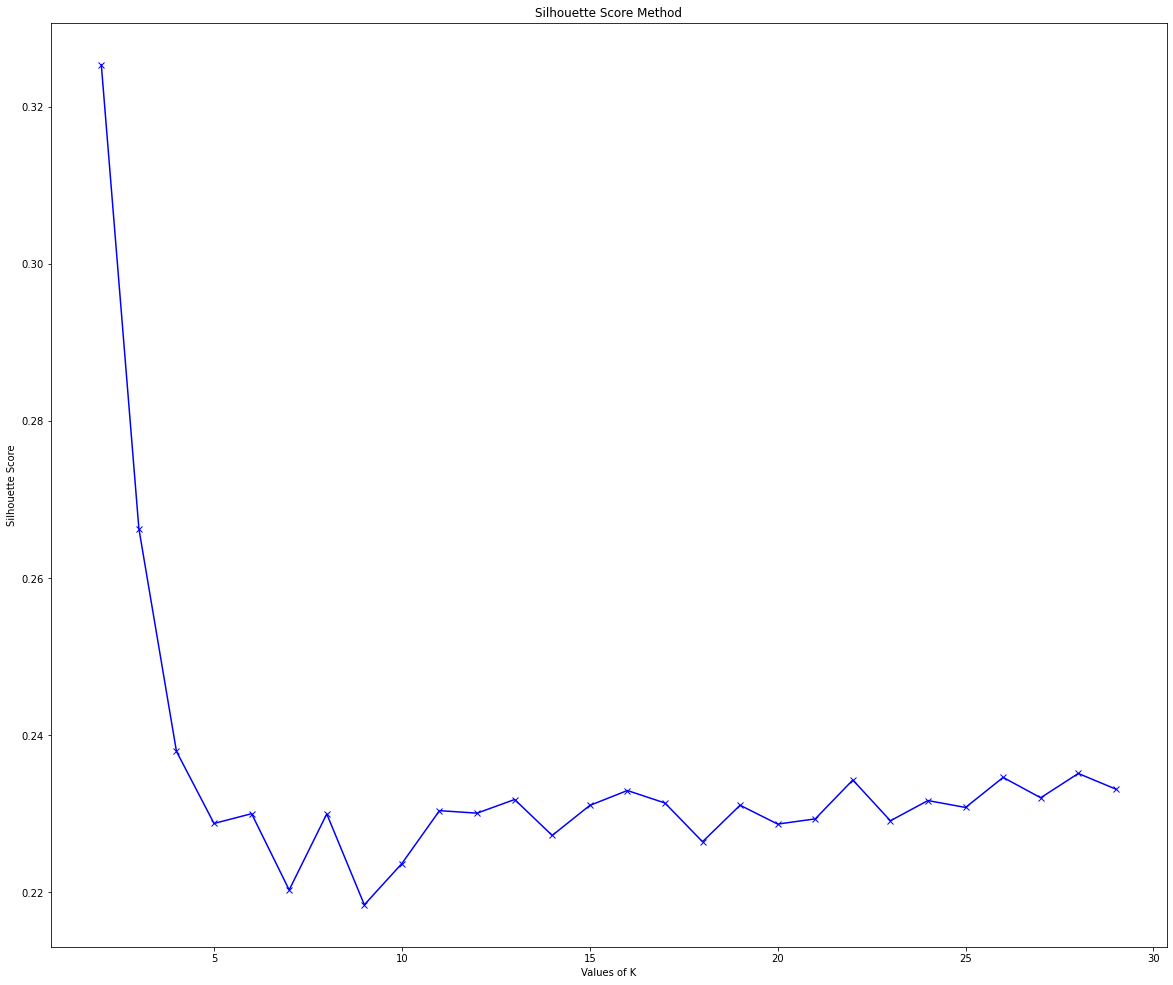

In [7]:
plt.figure(figsize=(20,17))
plt.plot(k, silhouettes, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Score Method') 
plt.show()